In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from datetime import datetime
print(os.getcwd())

%matplotlib ipympl

check = True

from jfunctions import *

/mhome/damtp/q/cwp29/diablo3/proc/jupyter/moisture


In [2]:
#Load simulation data
b, phi_v, phi_c, phi_p, times = load_data('th1_xz', 'th2_xz', 'th3_xz', 'th4_xz')
    
NSAMP = len(times)

# Load simulation metadata
md = get_metadata()

# Get dir locations from param file
base_dir, run_dir, save_dir, version = read_params('./params.dat')
print(base_dir)

bbins, phivbins, phicbins, phipbins = load_bins(save_dir, 'PVD_bbins', 'PVD_phivbins', 'PVD_phicbins', 'PVD_phipbins')

times, t0_idx = calibrate_time(save_dir, times)


# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['B_xy', 'B_xz', 'B_yz', 'Ent_phic_flux_int', 'Ent_phic_flux_rec', 'Ent_phip_flux_int', 'Ent_phip_flux_rec', 'Ent_phiv_flux_int', 'Ent_phiv_flux_rec', 'N2_xy', 'N2_xz', 'N2_yz', 'Re_b_xy', 'Re_b_xz', 'Re_b_yz', 'Ri_xy', 'Ri_xz', 'Ri_yz', 'b_phic_F1', 'b_phic_F3', 'b_phic_Jc', 'b_phic_K', 'b_phic_M', 'b_phic_S', 'b_phic_W', 'b_phip_F1', 'b_phip_F4', 'b_phip_M', 'b_phip_S', 'b_phip_W', 'b_phiv_F1', 'b_phiv_F2', 'b_phiv_Jv', 'b_phiv_M', 'b_phiv_S', 'b_phiv_W', 'chi1_xy', 'chi1_xz', 'chi1_yz', 'chi2_xy', 'chi2_xz', 'chi2_yz', 'chi3_xy', 'chi3_xz', 'chi3_yz', 'chi4_xy', 'chi4_xz', 'chi4_yz', 'diff_th1_xy', 'diff_th1_xz', 'diff_th1_yz', 'diff_th2_xy', 'diff_th2_xz', 'diff_th2_yz', 'diff_th3_xy', 'diff_th3_xz', 'diff_th3_yz', 'diff_th4_xy', 'diff_th4_xz', 'diff_th4_yz', 'epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'kappa_t3_xy', 'kappa_t3_xz', 'kappa_t3_yz', 'kappa_t4_xy', 'kappa_t4_xz',

In [3]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 5.0, 'VERSION': 3.12, 'NU_START_TIME': 15.0, 'r0': 0.002, 'alpha_e': 0.11, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.2, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.2, 'phiv_factor': 1.0, 'phic_factor': 0.3, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'phi0': 0.26, 'alpha': 67.0, 'beta': 0.51, 'tau': 0.1, 'q0': 15.0, 'phiv_min': 0.0002, 'phic_min': 0.0002, 'T': 10.0, 'Trelax': 0.5, 'w_s': 0.0, 'INIT_NOISE': 1e-08, 'shear_rate': 0.2, 'Nx': 256, 'Ny': 256, 'Nz': 257, 'Nth': 4}


In [4]:
#Create grids
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

db = bbins[1] - bbins[0]
dphiv = phivbins[1] - phivbins[0]
dphic = phicbins[1] - phicbins[0]
dphip = phipbins[1] - phipbins[0]

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 97
Dimensional times:  [-3.89326659 -3.64326659 -3.39326659 -3.14326659 -2.89326659 -2.64326659
 -2.39326659 -2.14326659 -1.89326659 -1.64326659 -1.39326659 -1.14326659
 -0.89326659 -0.64326659 -0.39326659 -0.14326659  0.          0.25
  0.5         0.75        1.          1.25        1.5         1.75
  2.          2.25        2.5         2.75        3.          3.25
  3.5         3.75        4.          4.25        4.5         4.75
  5.          5.25        5.5         5.75        6.          6.25
  6.5         6.75        7.          7.25        7.5         7.75
  8.          8.25        8.5         8.75        9.          9.25
  9.5         9.75       10.         10.25       10.5        10.75
 11.         11.25       11.5        11.75       12.         12.25
 12.5        12.75       13.         13.25       13.5        13.75
 14.         14.25       14.5        14.75       15.         15.25
 15.5        15.75       16.         16.25       16.5        16.75
 17.     

In [5]:
# Non-dimensionalising
F0 = compute_F0(save_dir, md, tstart_ind = 2*4, verbose=False, zbot=0.7, ztop=0.95, plot=False, moist=True, vapour=True)
N = np.sqrt(md['N2'])
T = np.power(N, -1)
L = np.power(F0, 1/4) * np.power(N, -3/4)

# CURRENTLY OMITTED!

In [6]:
b_az, phiv_az, phic_az, phip_az, w_az = load_az_data('b_az', 'phiv_az', 'phic_az', 'phip_az', 'w_az')

Az keys: <KeysViewHDF5 ['b_az', 'bb_sfluc', 'p_az', 'phic_az', 'phip_az', 'phiv_az', 'u_az', 'ub_sfluc', 'uu_sfluc', 'uv_sfluc', 'uw_sfluc', 'v_az', 'vv_sfluc', 'vw_sfluc', 'w_az', 'wb_sfluc', 'ww_sfluc']>


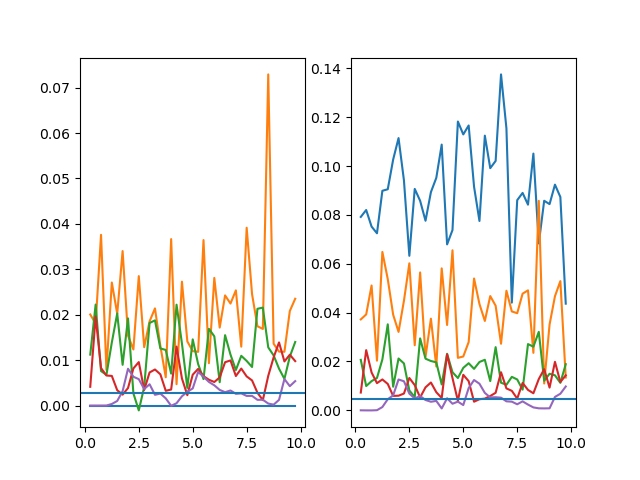

Saturation parameter:  0.1310602961114726


In [7]:
z_pen = md['H']

phip_postpen = phip_az[np.logical_and(times > 0, times < md['T']), :, :]
b_postpen = b_az[np.logical_and(times > 0, times < md['T']), :, :]

phip_pen = np.mean(phip_postpen[:, get_index(gzf, z_pen), 0])
b_pen = np.mean(b_postpen[:, get_index(gzf, z_pen), 0])

phi_vs_pen = md['q0']*np.exp(md['alpha']*(b_pen - md['beta']*z_pen))

sat_param = phip_pen / phi_vs_pen

if check: 
    fig, ax = plt.subplots(1,2)
    for z in np.linspace(0, md['H'], 5):
        ax[0].plot(times[np.logical_and(times>0,times<md['T'])], phip_postpen[:, get_index(gzf, z), 0])
        ax[1].plot(times[np.logical_and(times>0,times<md['T'])], b_postpen[:, get_index(gzf, z), 0])
    ax[0].axhline(phip_pen)
    ax[1].axhline(b_pen)
    plt.show()

print("Saturation parameter: ", sat_param)

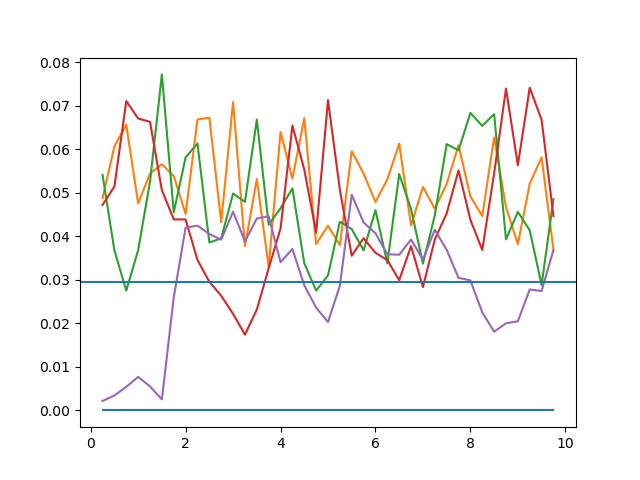

Sedimentation parameter:  0.0


In [8]:
w_postpen = w_az[np.logical_and(times > 0, times < md['T']), :, :]
w_pen = np.mean(w_postpen[:, get_index(gzf, z_pen), 0])

if check: 
    plt.figure()
    for z in np.linspace(0, md['H'], 5):
        plt.plot(times[np.logical_and(times>0,times<md['T'])], w_postpen[:, get_index(gzf, z), 0])
    plt.axhline(w_pen)
    plt.show()

sediment_param = md['w_s']/w_pen
print("Sedimentation parameter: ", sediment_param)

0.0001
zmax:  0.25532481847340194
Shear parameter 0.3738763432453842


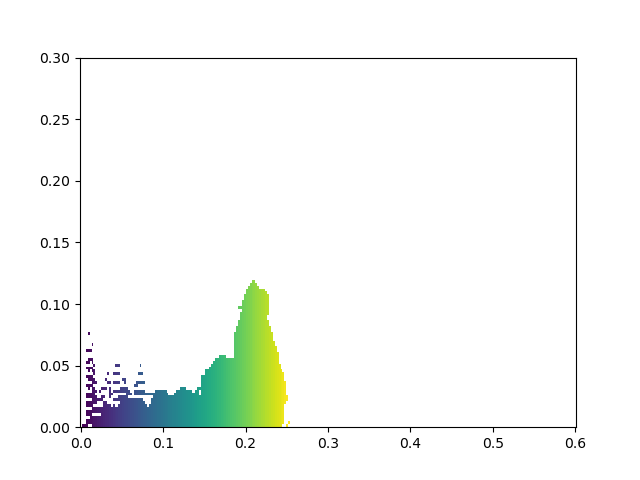

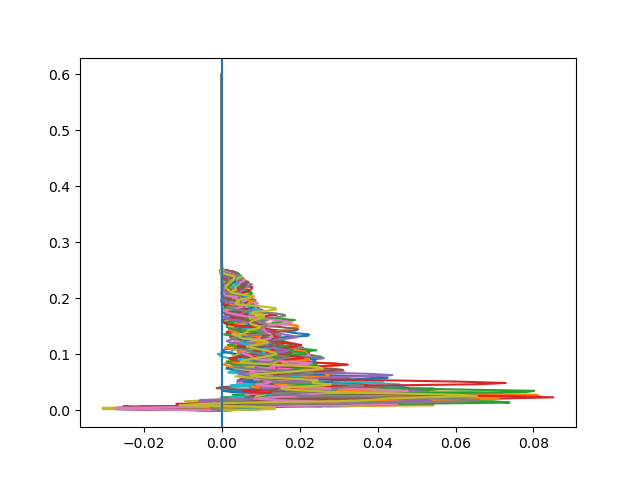

In [9]:
phic_postpen = phic_az[np.logical_and(times > 0, times < md['T']), :, :]
phic_pen = np.mean(phic_postpen[:, get_index(gzf, z_pen), 0])

phiv_postpen = phiv_az[np.logical_and(times > 0, times < md['T']), :, :]
phiv_pen = np.mean(phiv_postpen[:, get_index(gzf, z_pen), 0])

phi_total = phic_postpen + phiv_postpen

thresh = 1e4*md['INIT_NOISE']
print(thresh)

dr = md['LX']/md['Nx']
nbins = int(md['Nx']/2)
r_bins = np.array([r*dr for r in range(0, nbins+1)])
r_points = np.array([0.5*(r_bins[i]+r_bins[i+1]) for i in range(nbins)])

X, Y = np.meshgrid(gzf, r_points, indexing='ij')

phi_nonzero = np.where(phi_total > thresh, X, np.NaN)
plt.figure()
plt.pcolormesh(X, Y, phi_nonzero[-1])
zmax = np.nanmax(phi_nonzero)
print("zmax: ", zmax)

T_dyn = (zmax-z_pen)/w_pen
print("Shear parameter", md['shear_rate']*T_dyn)

if check: 
    plt.figure()
    for i in range(len(w_postpen)):
        plt.plot(phi_total[i, :, 0], gzf)
        
    plt.axvline(thresh)